In [6]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [5]:
def get_snp500():
    # Create a Response object
    r = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

    # Get HTML data
    html_data = r.text

    # Create a BeautifulSoup Object
    paget_snp500ge_content = BeautifulSoup(html_data, 'html.parser')

    # Find financipaget_snp500ge_contental table
    #constituents
    wikitable = paget_snp500ge_content.find('table', {'id': 'constituents'})

    # Find all column titles
    wikicolumns = wikitable.findAll('tr')[0].findAll('th')

    # Loop through column titles and store into Python array
    df_columns = []
    for column in wikicolumns:
        # remove <br/> inside <th> text, such as `<th>Total<br/>production</th>`
        text = column.get_text(strip=True, separator=" ")
        # append the text into df_columns
        df_columns.append(text)

    # Loop through the data rows and store into Python array
    df_data = []
    for row in wikitable.tbody.findAll('tr')[1:]:
        row_data = []
        for td in row.findAll('td'):
            text = td.get_text(strip=True, separator=" ")
            row_data.append(text)
        df_data.append(np.array(row_data))    

    # Print financial data in DataFrame format and set `Year` as index
    dataframe = pd.DataFrame(data=df_data, columns=df_columns)
    dataframe.set_index(['Symbol'], inplace=True)
    return dataframe

get_snp500()

,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
Symbol,,,,,,,,
MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,0000066740,1902
ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago , Illinois",1964-03-31,0000001800,1888
ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago , Illinois",2012-12-31,0001551152,2013 (1888)
ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
...,...,...,...,...,...,...,...,...
YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,0001041061,1997
ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,0000877212,1969
ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,0001136869,1927


In [13]:
def get_dow():
    # Create a Response object
    r = requests.get('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')

    # Get HTML data
    html_data = r.text

    # Create a BeautifulSoup Object
    paget_snp500ge_content = BeautifulSoup(html_data, 'html.parser')

    # Find financipaget_snp500ge_contental table
    #constituents
    wikitable = paget_snp500ge_content.find('table', {'id': 'constituents'})

    # Find all column titles
    wikicolumns = wikitable.findAll('tr')[0].findAll('th')

    # Loop through column titles and store into Python array
    df_columns = []
    for column in wikicolumns:
        # remove <br/> inside <th> text, such as `<th>Total<br/>production</th>`
        text = column.get_text(strip=True, separator=" ")
        # append the text into df_columns
        df_columns.append(text)

    # Loop through the data rows and store into Python array
    df_data = []
    for row in wikitable.tbody.findAll('tr')[1:]:
        row_data = []
        for td in row.findAll(['td', 'th']):
            text = td.get_text(strip=True, separator=" ")
            row_data.append(text)
        df_data.append(np.array(row_data))    

    # Print financial data in DataFrame format and set `Year` as index
    dataframe = pd.DataFrame(data=df_data, columns=df_columns)
    dataframe.set_index(['Symbol'], inplace=True)
    return dataframe

get_dow()

,Company,Exchange,Industry,Date added,Notes,Index weighting
Symbol,,,,,,
MMM,3M,NYSE,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.73%
AXP,American Express,NYSE,Financial services,1982-08-30,,3.20%
AMGN,Amgen,NASDAQ,Pharmaceutical industry,2020-08-31,,4.52%
AAPL,Apple Inc.,NASDAQ,Information technology,2015-03-19,,2.75%
BA,Boeing,NYSE,Aerospace and defense,1987-03-12,,4.26%
CAT,Caterpillar Inc.,NYSE,Construction and Mining,1991-05-06,,3.88%
CVX,Chevron Corporation,NYSE,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,1.92%
CSCO,Cisco Systems,NASDAQ,Information technology,2009-06-08,,1.05%
KO,The Coca-Cola Company,NYSE,Food industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.07%


In [15]:
def get_wiki_table_stocks(wiki_url, table_id):
    # Create a Response object
    r = requests.get(wiki_url)

    # Get HTML data
    html_data = r.text

    # Create a BeautifulSoup Object
    paget_snp500ge_content = BeautifulSoup(html_data, 'html.parser')

    # Find financipaget_snp500ge_contental table
    #constituents
    wikitable = paget_snp500ge_content.find('table', {'id': table_id})

    # Find all column titles
    wikicolumns = wikitable.findAll('tr')[0].findAll('th')

    # Loop through column titles and store into Python array
    df_columns = []
    for column in wikicolumns:
        # remove <br/> inside <th> text, such as `<th>Total<br/>production</th>`
        text = column.get_text(strip=True, separator=" ")
        # append the text into df_columns
        df_columns.append(text)

    # Loop through the data rows and store into Python array
    df_data = []
    for row in wikitable.tbody.findAll('tr')[1:]:
        row_data = []
        for td in row.findAll(['td', 'th']):
            text = td.get_text(strip=True, separator=" ")
            row_data.append(text)
        df_data.append(np.array(row_data))    

    # Print financial data in DataFrame format and set `Year` as index
    dataframe = pd.DataFrame(data=df_data, columns=df_columns)
    dataframe.set_index(['Symbol'], inplace=True)
    return dataframe

display(get_wiki_table_stocks('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies', 'constituents'))
display(get_wiki_table_stocks('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average', 'constituents'))

,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
Symbol,,,,,,,,
MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,0000066740,1902
ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago , Illinois",1964-03-31,0000001800,1888
ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago , Illinois",2012-12-31,0001551152,2013 (1888)
ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
...,...,...,...,...,...,...,...,...
YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,0001041061,1997
ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,0000877212,1969
ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,0001136869,1927


,Company,Exchange,Industry,Date added,Notes,Index weighting
Symbol,,,,,,
MMM,3M,NYSE,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.73%
AXP,American Express,NYSE,Financial services,1982-08-30,,3.20%
AMGN,Amgen,NASDAQ,Pharmaceutical industry,2020-08-31,,4.52%
AAPL,Apple Inc.,NASDAQ,Information technology,2015-03-19,,2.75%
BA,Boeing,NYSE,Aerospace and defense,1987-03-12,,4.26%
CAT,Caterpillar Inc.,NYSE,Construction and Mining,1991-05-06,,3.88%
CVX,Chevron Corporation,NYSE,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,1.92%
CSCO,Cisco Systems,NASDAQ,Information technology,2009-06-08,,1.05%
KO,The Coca-Cola Company,NYSE,Food industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.07%


In [105]:
from platform import python_version
import time
from datetime import datetime
import os
import pandas as pd
import numpy as np
import math
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 8)

# Set the import path for the tools directiory
import sys
# insert at position 1 in the path, as 0 is the path of this file.
sys.path.insert(1, '../tools')
import importlib
import ameritrade_functions as amc
importlib.reload(amc)
import trading_factors as alpha_factors
importlib.reload(alpha_factors)
import utils
importlib.reload(utils)
import nonoverlapping_estimator as ai_estimator
importlib.reload(ai_estimator)

print(f'Python version: {python_version()}')
print(f'Pandas version: {pd.__version__}')

Sci-Kit version: 0.24.1
Python version: 3.8.10
Pandas version: 0.25.3


# Factor demean by sector

In [4]:
price_histories_file_name = '../portfolio-ind/data/price_histories.csv'
price_histories = utils.read_price_histories(price_histories_file_name)
print(f'Date range for price histories: {price_histories.date.min().date()} to {price_histories.date.max().date()}')
close = utils.get_close_values(price_histories)
print(f'You have {len(close.columns)} stocks')

Date range for price histories: 2016-11-01 to 2021-10-29
You have 437 stocks


In [52]:
close

ticker,A,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 00:00:00+00:00,43.49,139.79,27.8725,56.45,69.79,39.05,116.14,106.87,63.60,46.75,...,28.86,98.23,40.86,83.65,58.40,47.19,60.69,66.58,32.24,47.25
2016-11-02 00:00:00+00:00,43.26,138.14,27.8975,56.79,75.96,38.70,118.61,105.89,63.66,47.26,...,28.30,96.52,40.46,83.45,59.74,46.96,59.70,65.45,30.96,50.11
2016-11-03 00:00:00+00:00,43.66,138.85,27.4575,55.89,72.32,38.38,116.95,107.17,63.85,47.43,...,28.14,87.53,40.62,83.66,59.55,47.24,60.15,64.08,31.17,48.95
2016-11-04 00:00:00+00:00,44.32,136.19,27.2100,56.04,70.47,39.09,117.23,106.20,63.43,46.92,...,28.15,88.04,40.36,83.57,60.60,47.40,59.81,62.97,31.39,49.94
2016-11-07 00:00:00+00:00,45.71,137.54,27.6025,58.91,71.93,39.86,119.97,108.66,64.36,47.05,...,28.79,87.86,41.15,85.45,61.12,48.56,62.01,64.69,32.25,49.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25 00:00:00+00:00,158.34,230.13,148.6400,108.50,122.60,126.58,356.44,646.97,180.52,66.63,...,37.73,90.42,64.66,64.35,57.27,129.05,125.94,532.46,66.12,211.52
2021-10-26 00:00:00+00:00,158.19,232.56,149.3200,109.49,122.96,128.13,356.34,642.50,179.88,65.36,...,36.76,92.16,64.48,65.84,56.89,127.80,126.18,525.41,65.29,210.52
2021-10-27 00:00:00+00:00,155.26,230.35,148.8500,108.40,119.55,127.71,354.05,640.08,170.46,64.53,...,35.71,91.79,63.39,64.13,56.47,128.00,125.79,517.84,62.88,209.58


In [78]:
sector_helper = utils.get_sector_helper(utils.get_snp500(), 'GICS Sector', close.columns)

In [106]:
alpha_factor = alpha_factors.FactorMomentum(price_histories, 252)

In [111]:
 alpha_factor.factor_data

ticker,A,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-11-01 00:00:00+00:00,0.447271,-0.548783,0.403400,0.493204,0.093367,0.324141,0.207769,0.500290,0.358136,-0.140554,...,0.201710,0.433604,0.186352,0.002627,0.046177,0.337743,0.202467,0.535775,0.360205,0.311368
2017-11-02 00:00:00+00:00,0.454189,-0.525336,0.409787,0.471719,-0.036602,0.339973,0.190006,0.535765,0.354993,-0.162793,...,0.215624,0.441218,0.196799,0.000958,0.023492,0.356292,0.282013,0.543443,0.414255,0.295088
2017-11-03 00:00:00+00:00,0.448502,-0.529117,0.451464,0.501767,0.033717,0.368306,0.208345,0.531237,0.363185,-0.175891,...,0.224138,0.539254,0.199529,-0.005754,0.084489,0.343013,0.271467,0.578957,0.406641,0.338804
2017-11-06 00:00:00+00:00,0.431302,-0.523188,0.470612,0.506104,0.060433,0.341648,0.205189,0.532067,0.374890,-0.177983,...,0.222362,0.542068,0.202111,0.002152,0.052555,0.339181,0.289227,0.609120,0.391887,0.333521
2017-11-07 00:00:00+00:00,0.400860,-0.549668,0.459499,0.466858,0.040594,0.324865,0.179093,0.509610,0.356209,-0.173898,...,0.209223,0.549385,0.195399,-0.022127,0.051964,0.316055,0.267277,0.524581,0.330474,0.314481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25 00:00:00+00:00,0.399703,0.397027,0.256247,0.251894,0.209976,0.160690,0.439392,0.280960,0.373948,0.250414,...,0.265576,0.166391,-0.100135,0.633282,0.152900,0.342878,0.217917,0.561402,0.688921,0.257568
2021-10-26 00:00:00+00:00,0.413367,0.430479,0.260725,0.265969,0.223123,0.161697,0.485764,0.301631,0.395426,0.244366,...,0.273993,0.225969,-0.105996,0.680170,0.178077,0.349879,0.240571,0.576865,0.698830,0.271411
2021-10-27 00:00:00+00:00,0.381285,0.426235,0.244190,0.270488,0.202345,0.162275,0.472815,0.290812,0.348595,0.247933,...,0.277374,0.245201,-0.131933,0.669874,0.172138,0.362720,0.249748,0.582271,0.704664,0.254612


In [108]:
demeaned_sectors = []
for sector_tickers in sector_helper.values():
    sector_factor_data = alpha_factor.factor_data[sector_tickers]
    demeaned_sectors.append(sector_factor_data.sub(sector_factor_data.mean(axis=1), axis=0))
    
demeaned_data = pd.concat(demeaned_sectors, axis=1).sort_index(axis=1)
demeaned_data.head()

ticker,A,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-11-01 00:00:00+00:00,0.231083,-0.690200,0.082107,0.277016,-0.122821,0.107953,-0.113524,0.178997,0.036843,-0.131810,...,0.102246,0.292188,0.030289,-0.020580,-0.170011,0.083649,0.061050,0.214482,0.057882,0.095180
2017-11-02 00:00:00+00:00,0.237635,-0.670315,0.075305,0.255165,-0.253156,0.123418,-0.144476,0.201282,0.020510,-0.154574,...,0.094842,0.296239,0.019069,-0.035120,-0.193063,0.091985,0.137034,0.208960,0.092457,0.078534
2017-11-03 00:00:00+00:00,0.209751,-0.683807,0.107287,0.263017,-0.205033,0.129556,-0.135832,0.187060,0.019008,-0.178395,...,0.098751,0.384564,0.021985,-0.039055,-0.154261,0.078949,0.116777,0.234780,0.090810,0.100054
2017-11-06 00:00:00+00:00,0.207833,-0.678066,0.115060,0.282635,-0.163036,0.118179,-0.150363,0.176515,0.019338,-0.178590,...,0.092233,0.387190,0.028439,-0.062038,-0.170914,0.074595,0.134350,0.253568,0.073592,0.110053
2017-11-07 00:00:00+00:00,0.198697,-0.677333,0.132644,0.264695,-0.161569,0.122701,-0.147762,0.182755,0.029354,-0.164526,...,0.091919,0.421720,0.029513,-0.061360,-0.150199,0.073851,0.139612,0.197726,0.050751,0.112317


In [110]:
alpha_factors.FactorMomentum(price_histories, 252).demean(groupby=sector_helper.values()).factor_data

ticker,A,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-11-01 00:00:00+00:00,0.231083,-0.690200,0.082107,0.277016,-0.122821,0.107953,-0.113524,0.178997,0.036843,-0.131810,...,0.102246,0.292188,0.030289,-0.020580,-0.170011,0.083649,0.061050,0.214482,0.057882,0.095180
2017-11-02 00:00:00+00:00,0.237635,-0.670315,0.075305,0.255165,-0.253156,0.123418,-0.144476,0.201282,0.020510,-0.154574,...,0.094842,0.296239,0.019069,-0.035120,-0.193063,0.091985,0.137034,0.208960,0.092457,0.078534
2017-11-03 00:00:00+00:00,0.209751,-0.683807,0.107287,0.263017,-0.205033,0.129556,-0.135832,0.187060,0.019008,-0.178395,...,0.098751,0.384564,0.021985,-0.039055,-0.154261,0.078949,0.116777,0.234780,0.090810,0.100054
2017-11-06 00:00:00+00:00,0.207833,-0.678066,0.115060,0.282635,-0.163036,0.118179,-0.150363,0.176515,0.019338,-0.178590,...,0.092233,0.387190,0.028439,-0.062038,-0.170914,0.074595,0.134350,0.253568,0.073592,0.110053
2017-11-07 00:00:00+00:00,0.198697,-0.677333,0.132644,0.264695,-0.161569,0.122701,-0.147762,0.182755,0.029354,-0.164526,...,0.091919,0.421720,0.029513,-0.061360,-0.150199,0.073851,0.139612,0.197726,0.050751,0.112317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25 00:00:00+00:00,0.185457,0.090571,-0.060202,0.037648,-0.004270,-0.053556,0.122943,-0.035489,0.057499,0.175091,...,-0.131744,-0.140065,-0.129394,-0.161506,-0.061346,0.054233,-0.088539,0.244952,0.198770,0.043322
2021-10-26 00:00:00+00:00,0.185585,0.095386,-0.075757,0.038188,-0.004658,-0.066084,0.149282,-0.034851,0.058944,0.152454,...,-0.144966,-0.109124,-0.140877,-0.162465,-0.049705,0.044088,-0.094521,0.240383,0.186164,0.043630
2021-10-27 00:00:00+00:00,0.159121,0.086063,-0.085433,0.048324,-0.019819,-0.059889,0.143192,-0.038812,0.018972,0.157715,...,-0.151939,-0.094970,-0.160862,-0.151778,-0.050026,0.050302,-0.090423,0.252648,0.187922,0.032448


In [72]:
alpha_factors.factor_data.describe()

ticker,A,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA,ZION,ZTS
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,...,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.005034,0.004738,0.002953,0.002869,0.001593,0.002721,0.001401,0.005929,0.003579,0.002100,...,0.001722,0.006590,-0.000432,0.002839,0.000103,0.002543,0.001730,0.007189,0.003622,0.003778
std,0.024390,0.032991,0.026580,0.022445,0.024480,0.021243,0.020713,0.025087,0.024006,0.019203,...,0.025466,0.048249,0.014980,0.025850,0.026756,0.025526,0.021129,0.027410,0.028769,0.019891
min,-0.174476,-0.171004,-0.182154,-0.131249,-0.191590,-0.185389,-0.163568,-0.184438,-0.155574,-0.158127,...,-0.209884,-0.276116,-0.162945,-0.169463,-0.187678,-0.221378,-0.158277,-0.218469,-0.171545,-0.154339
25%,-0.003101,-0.006101,-0.007149,-0.006341,-0.006164,-0.004972,-0.006294,-0.004330,-0.007422,-0.004042,...,-0.005215,-0.012364,-0.005390,-0.008751,-0.007076,-0.004088,-0.003430,-0.002890,-0.009676,-0.004067
50%,0.004878,0.004459,0.003197,0.003136,0.002570,0.002042,0.002627,0.005700,0.004376,0.003275,...,0.002399,0.005939,0.000212,0.002270,0.001933,0.004605,0.002824,0.007063,0.003560,0.004344
75%,0.014148,0.014245,0.014268,0.011619,0.010317,0.009399,0.009669,0.016444,0.015679,0.010436,...,0.010554,0.023197,0.005902,0.012736,0.009729,0.012722,0.009173,0.017070,0.016546,0.011916
max,0.120438,0.188325,0.124859,0.120248,0.159090,0.160525,0.094618,0.117632,0.090700,0.076012,...,0.177563,0.401825,0.067709,0.161669,0.135573,0.115065,0.137347,0.123031,0.160753,0.094521


In [114]:
price_histories

,open,high,low,close,volume,ticker,date
0,43.73,44.110,43.1400,43.490,2133116,A,2016-11-01
1,131.48,131.630,129.3805,129.660,2112003,COST,2016-11-01
2,71.13,71.130,68.9200,69.440,7375307,TXN,2016-11-01
3,54.40,54.530,53.2300,53.410,1990845,CPB,2016-11-01
4,26.31,26.330,25.9350,25.965,973096,CPRT,2016-11-01
...,...,...,...,...,...,...,...
544244,115.77,120.110,114.3750,119.820,3340898,EW,2021-10-29
544245,52.67,53.540,52.5900,53.190,6644042,EXC,2021-10-29
544246,232.59,234.330,229.7600,233.740,475586,STE,2021-10-29
544247,323.74,327.015,322.6500,324.330,1135667,EL,2021-10-29


In [115]:
all_factors = pd.concat(
[
    alpha_factors.OvernightSentiment(price_histories, 5).rank().zscore().smoothed(10).rank().zscore().for_al(),
    alpha_factors.FactorMeanReversion(price_histories, 5).demean(groupby=sector_helper.values()).rank().zscore().for_al(),
    alpha_factors.AnnualizedVolatility(price_histories, 20).rank().zscore().for_al(),
    alpha_factors.AnnualizedVolatility(price_histories, 120).rank().zscore().for_al(),
    alpha_factors.MarketDispersion(price_histories, 120).for_al()
], axis=1)

In [117]:
all_factors.sort_index(inplace=True)
all_factors = all_factors.dropna()
all_factors

overnight_sentiment_5_day_smoothed  \
date                      ticker                                       
2017-10-13 00:00:00+00:00 A                                 1.173200   
                          AAP                              -1.553697   
                          AAPL                              0.221957   
                          ABBV                              0.000000   
                          ABC                               1.593332   
...                                                              ...   
2021-10-29 00:00:00+00:00 XYL                               0.404278   
                          YUM                              -1.220762   
                          ZBRA                              1.109784   
                          ZION                             -1.268324   
                          ZTS                               0.150614   

                                  mean_reversion_5_day_logret  \
date                      ticker                                
2017-10-13 00:00:00+00:00 A                         -1.252470   
                          AAP                        1.704311   
                          AAPL                       0.245738   
                          ABBV                      -0.824411   
                          ABC                        0.317081   
...                                                       ...   
2021-10-29 00:00:00+00:00 XYL                       -0.689651   
                          YUM                        0.642089   
                          ZBRA                      -0.626235   
                          ZION                       1.244543   
                          ZTS                       -1.189054   

                                  annualzed_volatility_20_day  \
date                      ticker                                
2017-10-13 00:00:00+00:00 A                         -0.015854   
                          AAP                        1.553702   
                          AAPL                      -0.079271   
                          ABBV                       1.625045   
                          ABC                        1.133568   
...                                                       ...   
2021-10-29 00:00:00+00:00 XYL                        0.895754   
                          YUM                       -0.871973   
                          ZBRA                       1.284178   
                          ZION                      -0.015854   
                          ZTS                        0.808557   

                                  annualzed_volatility_120_day  \
date                      ticker                                 
2017-10-13 00:00:00+00:00 A                          -1.165276   
                          AAP                         1.601264   
                          AAPL                        0.887830   
                          ABBV                        0.840267   
                          ABC                         1.379307   
...                                                        ...   
2021-10-29 00:00:00+00:00 XYL                        -0.903681   
                          YUM                        -0.618308   
                          ZBRA                        0.332935   
                          ZION                        0.832338   
                          ZTS                        -0.325008   

                                  market_dispersion120_day  
date                      ticker                            
2017-10-13 00:00:00+00:00 A                       0.012455  
                          AAP                     0.012455  
                          AAPL                    0.012455  
                          ABBV                    0.012455  
                          ABC                     0.012455  
...                                                    ...  
2021-10-29 00:00:00+00:00 XYL                     0.014001

In [125]:
alpha_factors.MarketDispersion(price_histories, 120).factor_data.dropna().head(20)

ticker,A,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-04-26 00:00:00+00:00,0.012997,0.012997,0.012997,0.012997,0.012997,0.012997,0.012997,0.012997,0.012997,0.012997,...,0.012997,0.012997,0.012997,0.012997,0.012997,0.012997,0.012997,0.012997,0.012997,0.012997
2017-04-27 00:00:00+00:00,0.012936,0.012936,0.012936,0.012936,0.012936,0.012936,0.012936,0.012936,0.012936,0.012936,...,0.012936,0.012936,0.012936,0.012936,0.012936,0.012936,0.012936,0.012936,0.012936,0.012936
2017-04-28 00:00:00+00:00,0.012906,0.012906,0.012906,0.012906,0.012906,0.012906,0.012906,0.012906,0.012906,0.012906,...,0.012906,0.012906,0.012906,0.012906,0.012906,0.012906,0.012906,0.012906,0.012906,0.012906
2017-05-01 00:00:00+00:00,0.012854,0.012854,0.012854,0.012854,0.012854,0.012854,0.012854,0.012854,0.012854,0.012854,...,0.012854,0.012854,0.012854,0.012854,0.012854,0.012854,0.012854,0.012854,0.012854,0.012854
2017-05-02 00:00:00+00:00,0.012905,0.012905,0.012905,0.012905,0.012905,0.012905,0.012905,0.012905,0.012905,0.012905,...,0.012905,0.012905,0.012905,0.012905,0.012905,0.012905,0.012905,0.012905,0.012905,0.012905
2017-05-03 00:00:00+00:00,0.012933,0.012933,0.012933,0.012933,0.012933,0.012933,0.012933,0.012933,0.012933,0.012933,...,0.012933,0.012933,0.012933,0.012933,0.012933,0.012933,0.012933,0.012933,0.012933,0.012933
2017-05-04 00:00:00+00:00,0.012754,0.012754,0.012754,0.012754,0.012754,0.012754,0.012754,0.012754,0.012754,0.012754,...,0.012754,0.012754,0.012754,0.012754,0.012754,0.012754,0.012754,0.012754,0.012754,0.012754
2017-05-05 00:00:00+00:00,0.012628,0.012628,0.012628,0.012628,0.012628,0.012628,0.012628,0.012628,0.012628,0.012628,...,0.012628,0.012628,0.012628,0.012628,0.012628,0.012628,0.012628,0.012628,0.012628,0.012628
2017-05-08 00:00:00+00:00,0.012554,0.012554,0.012554,0.012554,0.012554,0.012554,0.012554,0.012554,0.012554,0.012554,...,0.012554,0.012554,0.012554,0.012554,0.012554,0.012554,0.012554,0.012554,0.012554,0.012554


In [143]:
daily_disp = alpha_factors.FactorReturns(price_histories, 1).factor_data
daily_disp[daily_disp.columns] = np.sqrt(np.nanmean(daily_disp.sub(daily_disp.mean(axis=1), axis=0)** 2, axis=1)).reshape(-1, 1)
daily_disp

ticker,A,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-11-02 00:00:00+00:00,0.024317,0.024317,0.024317,0.024317,0.024317,0.024317,0.024317,0.024317,0.024317,0.024317,...,0.024317,0.024317,0.024317,0.024317,0.024317,0.024317,0.024317,0.024317,0.024317,0.024317
2016-11-03 00:00:00+00:00,0.019605,0.019605,0.019605,0.019605,0.019605,0.019605,0.019605,0.019605,0.019605,0.019605,...,0.019605,0.019605,0.019605,0.019605,0.019605,0.019605,0.019605,0.019605,0.019605,0.019605
2016-11-04 00:00:00+00:00,0.016368,0.016368,0.016368,0.016368,0.016368,0.016368,0.016368,0.016368,0.016368,0.016368,...,0.016368,0.016368,0.016368,0.016368,0.016368,0.016368,0.016368,0.016368,0.016368,0.016368
2016-11-07 00:00:00+00:00,0.013343,0.013343,0.013343,0.013343,0.013343,0.013343,0.013343,0.013343,0.013343,0.013343,...,0.013343,0.013343,0.013343,0.013343,0.013343,0.013343,0.013343,0.013343,0.013343,0.013343
2016-11-08 00:00:00+00:00,0.014268,0.014268,0.014268,0.014268,0.014268,0.014268,0.014268,0.014268,0.014268,0.014268,...,0.014268,0.014268,0.014268,0.014268,0.014268,0.014268,0.014268,0.014268,0.014268,0.014268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25 00:00:00+00:00,0.012621,0.012621,0.012621,0.012621,0.012621,0.012621,0.012621,0.012621,0.012621,0.012621,...,0.012621,0.012621,0.012621,0.012621,0.012621,0.012621,0.012621,0.012621,0.012621,0.012621
2021-10-26 00:00:00+00:00,0.014834,0.014834,0.014834,0.014834,0.014834,0.014834,0.014834,0.014834,0.014834,0.014834,...,0.014834,0.014834,0.014834,0.014834,0.014834,0.014834,0.014834,0.014834,0.014834,0.014834
2021-10-27 00:00:00+00:00,0.021715,0.021715,0.021715,0.021715,0.021715,0.021715,0.021715,0.021715,0.021715,0.021715,...,0.021715,0.021715,0.021715,0.021715,0.021715,0.021715,0.021715,0.021715,0.021715,0.021715


In [127]:
daily_disp = alpha_factors.FactorReturns(price_histories, 1).factor_data
daily_disp.head()

ticker,A,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-11-02 00:00:00+00:00,-0.005303,-0.011874,0.000897,0.006005,0.084716,-0.009003,0.021044,-0.009212,0.000943,0.010850,...,-0.019595,-0.017561,-0.009838,-0.002394,0.022686,-0.004886,-0.016447,-0.017118,-0.040512,0.058768
2016-11-03 00:00:00+00:00,0.009204,0.005127,-0.015898,-0.015975,-0.049106,-0.008303,-0.014094,0.012016,0.002980,0.003591,...,-0.005670,-0.097769,0.003947,0.002513,-0.003186,0.005945,0.007509,-0.021154,0.006760,-0.023421
2016-11-04 00:00:00+00:00,0.015004,-0.019343,-0.009055,0.002680,-0.025914,0.018330,0.002391,-0.009092,-0.006600,-0.010811,...,0.000355,0.005810,-0.006421,-0.001076,0.017479,0.003381,-0.005669,-0.017474,0.007033,0.020023
2016-11-07 00:00:00+00:00,0.030881,0.009864,0.014322,0.049945,0.020506,0.019507,0.023104,0.022900,0.014555,0.002767,...,0.022481,-0.002047,0.019385,0.022247,0.008544,0.024178,0.036123,0.026948,0.027029,0.000801
2016-11-08 00:00:00+00:00,-0.001971,0.000945,0.005870,-0.001699,-0.041152,-0.000753,-0.001335,-0.002488,0.007585,0.014140,...,0.003121,-0.013637,0.008951,-0.001640,-0.001965,0.015124,-0.000161,0.001853,0.004640,0.006978


In [132]:
daily_mean = daily_disp.mean(axis=1)
daily_mean

date
2016-11-02 00:00:00+00:00   -0.008412
2016-11-03 00:00:00+00:00   -0.002442
2016-11-04 00:00:00+00:00    0.000239
2016-11-07 00:00:00+00:00    0.021926
2016-11-08 00:00:00+00:00    0.004500
                               ...   
2021-10-25 00:00:00+00:00    0.001780
2021-10-26 00:00:00+00:00   -0.002224
2021-10-27 00:00:00+00:00   -0.014547
2021-10-28 00:00:00+00:00    0.010372
2021-10-29 00:00:00+00:00   -0.001677
Length: 1257, dtype: float64

In [138]:
(-0.005303 - -0.008412) ** 2

9.665880999999993e-06

In [134]:
ret_sub_mean = daily_disp.sub(daily_mean, axis=0)
ret_sub_mean

ticker,A,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-11-02 00:00:00+00:00,0.003109,-0.003462,0.009308,0.014417,0.093128,-0.000592,0.029456,-0.000801,0.009355,0.019262,...,-0.011183,-0.009150,-0.001426,0.006018,0.031098,0.003526,-0.008035,-0.008706,-0.032100,0.067180
2016-11-03 00:00:00+00:00,0.011646,0.007569,-0.013456,-0.013533,-0.046664,-0.005861,-0.011652,0.014458,0.005422,0.006033,...,-0.003228,-0.095326,0.006389,0.004956,-0.000743,0.008387,0.009952,-0.018712,0.009202,-0.020979
2016-11-04 00:00:00+00:00,0.014765,-0.019582,-0.009294,0.002441,-0.026152,0.018091,0.002152,-0.009331,-0.006838,-0.011050,...,0.000116,0.005571,-0.006660,-0.001315,0.017240,0.003142,-0.005907,-0.017713,0.006794,0.019784
2016-11-07 00:00:00+00:00,0.008955,-0.012062,-0.007604,0.028020,-0.001419,-0.002419,0.001178,0.000974,-0.007370,-0.019159,...,0.000555,-0.023972,-0.002541,0.000321,-0.013381,0.002252,0.014197,0.005023,0.005103,-0.021125
2016-11-08 00:00:00+00:00,-0.006471,-0.003555,0.001370,-0.006199,-0.045652,-0.005253,-0.005835,-0.006988,0.003084,0.009640,...,-0.001379,-0.018137,0.004451,-0.006140,-0.006465,0.010624,-0.004661,-0.002647,0.000140,0.002478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25 00:00:00+00:00,0.000559,-0.009744,-0.002117,-0.007662,-0.007636,-0.002886,0.005682,0.003473,0.009921,0.004392,...,0.013981,0.012926,-0.015451,0.017519,-0.019605,0.000469,-0.006770,0.006783,-0.005855,0.012552
2021-10-26 00:00:00+00:00,0.001276,0.012728,0.006788,0.011307,0.005156,0.014395,0.001943,-0.004709,-0.001328,-0.017020,...,-0.023821,0.021285,-0.000564,0.025115,-0.004433,-0.007509,0.004128,-0.011105,-0.010408,-0.002515
2021-10-27 00:00:00+00:00,-0.004148,0.004999,0.011395,0.004542,-0.013577,0.011264,0.008100,0.010774,-0.039242,0.001767,...,-0.014432,0.010525,-0.002502,-0.011768,0.007137,0.016111,0.011452,0.000035,-0.023063,0.010072


In [137]:
ret_sub_mean_squared = ret_sub_mean ** 2
ret_sub_mean_squared

ticker,A,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-11-02 00:00:00+00:00,9.665893e-06,0.000012,0.000087,0.000208,8.672780e-03,3.500714e-07,0.000868,6.411448e-07,0.000088,0.000371,...,1.250626e-04,0.000084,2.033903e-06,3.621429e-05,9.670564e-04,1.243111e-05,0.000065,7.579673e-05,1.030427e-03,0.004513
2016-11-03 00:00:00+00:00,1.356321e-04,0.000057,0.000181,0.000183,2.177527e-03,3.435038e-05,0.000136,2.090259e-04,0.000029,0.000036,...,1.041717e-05,0.009087,4.081822e-05,2.455704e-05,5.525356e-07,7.034186e-05,0.000099,3.501389e-04,8.468112e-05,0.000440
2016-11-04 00:00:00+00:00,2.180011e-04,0.000383,0.000086,0.000006,6.839511e-04,3.272973e-04,0.000005,8.706905e-05,0.000047,0.000122,...,1.356599e-08,0.000031,4.435814e-05,1.729729e-06,2.972096e-04,9.874725e-06,0.000035,3.137401e-04,4.616451e-05,0.000391
2016-11-07 00:00:00+00:00,8.020044e-05,0.000145,0.000058,0.000785,2.014252e-06,5.851296e-06,0.000001,9.487776e-07,0.000054,0.000367,...,3.082136e-07,0.000575,6.455911e-06,1.031857e-07,1.790599e-04,5.073026e-06,0.000202,2.522679e-05,2.604155e-05,0.000446
2016-11-08 00:00:00+00:00,4.187352e-05,0.000013,0.000002,0.000038,2.084135e-03,2.759419e-05,0.000034,4.883224e-05,0.000010,0.000093,...,1.901339e-06,0.000329,1.981329e-05,3.769749e-05,4.180115e-05,1.128659e-04,0.000022,7.005643e-06,1.967839e-08,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25 00:00:00+00:00,3.126930e-07,0.000095,0.000004,0.000059,5.830648e-05,8.327249e-06,0.000032,1.206380e-05,0.000098,0.000019,...,1.954597e-04,0.000167,2.387250e-04,3.069143e-04,3.843739e-04,2.203656e-07,0.000046,4.600545e-05,3.428639e-05,0.000158
2021-10-26 00:00:00+00:00,1.628853e-06,0.000162,0.000046,0.000128,2.658556e-05,2.072131e-04,0.000004,2.217530e-05,0.000002,0.000290,...,5.674493e-04,0.000453,3.176803e-07,6.307464e-04,1.965419e-05,5.639021e-05,0.000017,1.233171e-04,1.083336e-04,0.000006
2021-10-27 00:00:00+00:00,1.720854e-05,0.000025,0.000130,0.000021,1.843352e-04,1.268797e-04,0.000066,1.160736e-04,0.001540,0.000003,...,2.082867e-04,0.000111,6.257923e-06,1.384832e-04,5.094160e-05,2.595681e-04,0.000131,1.210890e-09,5.319178e-04,0.000101


In [139]:
mean_ret_sub_mean_squared = np.nanmean(ret_sub_mean_squared, axis=1)
mean_ret_sub_mean_squared

array([0.00059134, 0.00038436, 0.00026792, ..., 0.00047154, 0.00029409,
       0.00027269])

In [141]:
root_values = np.sqrt(mean_ret_sub_mean_squared).reshape(-1,1)
root_values

array([[0.02431743],
       [0.01960507],
       [0.01636837],
       ...,
       [0.02171499],
       [0.01714916],
       [0.01651326]])

In [ ]:
daily_disp[daily_disp.columns] = np.sqrt(np.nanmean(daily_disp.sub(daily_disp.mean(axis=1), axis=0)** 2, axis=1)).reshape(-1, 1)
daily_disp.rolling(120).mean().dropna().head(20)

In [113]:
alpha_factors.AnnualizedVolatility(price_histories, 120).rank().zscore().for_al()

date                       ticker
2017-10-13 00:00:00+00:00  A        -1.165276
                           AAP       1.601264
                           AAPL      0.887830
                           ABBV      0.840267
                           ABC       1.379307
                                       ...   
2021-10-29 00:00:00+00:00  XYL      -0.903681
                           YUM      -0.618308
                           ZBRA      0.332935
                           ZION      0.832338
                           ZTS      -0.325008
Name: annualzed_volatility_120_day, Length: 445303, dtype: float64

In [1]:
import urllib
import requests
from splinter import Browser
from selenium.webdriver.chrome.options import Options
import requests
import time
from datetime import datetime
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import os

import json 

from pathlib import Path

ok_reason = ''
unauthorized_reason = 'Unauthorized'

date_format = '%Y-%m-%d'

## Authentication Data
# These items here are used to obtain an authorization token from TD Ameritrade. It involves navigating to web pages, so using a browser emulator # to navigate the page and set fields and submit pages.

def configure_ameritrade(env_user_name, env_password, env_client_id):
    username = os.getenv(env_user_name)
    password = os.getenv(env_password)
    client_id = os.getenv(env_client_id)

    return username, password, client_id

class AmeritradeRest:
    
    def __init__(self, username, password, client_id, callback_url=r'http://localhost', executable_path=None):
        
        if executable_path is None:
            self.home = str(Path.home())
            self.executable_path = self.home + r'\Anaconda Projects\chromedriver\chromedriver'
        else:
            self.executable_path = executable_path
        
        # This is used to cache credentials in Chromedriver. You will have to manually log in the first time.
        self.user_data_dir = self.home + r'\AppData\Local\Google\Chrome\User Data\tduser'

        self.browser = None
        self.username = username
        self.password = password
        self.client_id = client_id
        self.callback_url = callback_url
        self.consumer_key = client_id + '@AMER.OAUTHAP'
        self.callback_url = r'http://localhost'
        self.oauth_url = r'https://auth.tdameritrade.com/auth'
        self.oath_token_url = r'https://api.tdameritrade.com/v1/oauth2/token'
        self.unmasked_accounts = {}

        
        self.browser_name = 'chrome'
        self.authorization = None
        self.account_data = None
        self.positions_data = None

    ###########################################################################################################
    # Authentication Functions
    ###########################################################################################################
    def start_browser(self):
        # Note: If you already have a browser open, you will get an error unless you close the current one.
        if not self.browser is None:
            print('Quitting current browser...')
            self.browser.quit()

        # Tell us where the chromedriver is located on your computer
        executable_path = {
            'executable_path':self.executable_path
        }

        # This next field is optional, but if you have 2 factor authentication turned on for your account,
        # you will have to manually add your texted code the first time and select 'Trust this Computer'.
        # If you don't do this, you will have to manually authenticate via text code everytime you start
        # this notebook, or run this cell.
        # This option gives it a permanent profile to use instead of creating a temp one everytime.
        options = Options()
        options.add_argument('--user-data-dir='+self.user_data_dir)

        self.browser = Browser(self.browser_name, **executable_path, headless = False, options=options)

    ## Ameritrade Functions
    
    def authenticate(self):
        self.start_browser()

        # define the components of the url
        method = 'GET'
        payload = {
                    'response_type':'code',
                    'redirect_uri':self.callback_url,
                    'client_id':self.consumer_key
        }

        # build url
        built_url = requests.Request(method, self.oauth_url, params=payload).prepare().url

        # go to URL
        self.browser.visit(built_url)

        #fill out form
        self.browser.find_by_id('username0').first.fill(self.username)
        self.browser.find_by_id('password1').first.fill(self.password)
        self.browser.find_by_id('accept').first.click()
        self.browser.find_by_id('accept').first.click()

        # give it a second
        time.sleep(1)
        new_url = self.browser.url

        # grab the URL and parse it
        code = urllib.parse.unquote(new_url.split('code=')[1])

        #define the headers
        headers = {'Content-Type':'application/x-www-form-urlencoded'}

        # define payload
        payload = {
            'grant_type':'authorization_code',
            'access_type': 'offline',
            'code': code,
            'client_id': self.client_id,
            'redirect_uri': 'http://localhost'
        }

        # post the data to get a token
        authreply = requests.post(self.oath_token_url, headers=headers, data=payload)

        # convert json to dict
        self.authorization = authreply.json()
        self.browser.quit()
        return self.authorization
    
    def get_access_token(self):
        return self.authorization['access_token']

    

In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP-Z440\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG']
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [11]:
news_tables['AMZN']

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" width="130">Oct-15-22 12:00PM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/the-ascent/personal-finance/articles/americans-are-cutting-back-on-groceries-more-than-streaming-services-to-save-money/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">Americans Are Cutting Back on Groceries More Than Streaming Services to Save Money</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
<tr><td align="right" width="130">11:23AM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/10/15/how-wrong-were-big-retailers-about-online-shopping/?source=eptyholnk000

In [52]:
# Read one single day of headlines for ‘AMZN’ 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into ‘amzn_tr’
amzn_tr = amzn.findAll('tr')
for i, table_row in enumerate(amzn_tr):
     # Read the text of the element ‘a’ into ‘link_text’
    a_text = table_row.a.text
     # Read the text of the element ‘td’ into ‘data_text’
    td_text = table_row.td.text
     # Print the contents of ‘link_text’ and ‘data_text’ 
    print(a_text)
    print(td_text)
    print()
     # Exit after printing 4 rows of data
    if i == 3:
         break

Americans Are Cutting Back on Groceries More Than Streaming Services to Save Money
Oct-15-22 12:00PM

How Wrong Were Big Retailers About Online Shopping Trends?
11:23AM

Market News From AMD, McCormick, Peloton, and More
10:46AM

You'll Probably Regret Not Buying This Top Dividend Stock at These Levels
10:05AM



In [53]:
parsed_news = []
# Iterate through the news
for file_name, news_table in news_tables.items():
    #print(file_name, news_table)
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        if x.a is None:
            continue
            
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element
        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news[:5] # print first 5 rows of news

[['MMM',
  'Oct-15-22',
  '08:00AM',
  'Positive week for 3M Company (NYSE:MMM) institutional investors who lost 35% over the past year'],
 ['MMM',
  'Oct-14-22',
  '09:10AM',
  '3M and Microsoft Launch New Post-It® App for Teams'],
 ['MMM',
  'Oct-14-22',
  '07:29AM',
  "3M's Lawsuit Hit-Earplug Unit Earns Faster Review For Bankruptcy Ruling"],
 ['MMM',
  'Oct-13-22',
  '05:56PM',
  '3M Earns Quick Appellate Review of Earplug Units Bankruptcy Shield'],
 ['MMM',
  'Oct-13-22',
  '03:42PM',
  'Federal court will hear 3M appeal over earplug lawsuits']]

In [54]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()
# Set column names
columns = ['ticker', 'date', 'time', 'headline']
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)
# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()
# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')
# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date
parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,MMM,2022-10-15,08:00AM,Positive week for 3M Company (NYSE:MMM) instit...,0.122,0.688,0.19,0.3182
1,MMM,2022-10-14,09:10AM,3M and Microsoft Launch New Post-It® App for T...,0.000,1.000,0.00,0.0000
2,MMM,2022-10-14,07:29AM,3M's Lawsuit Hit-Earplug Unit Earns Faster Rev...,0.174,0.826,0.00,-0.2263
3,MMM,2022-10-13,05:56PM,3M Earns Quick Appellate Review of Earplug Uni...,0.000,1.000,0.00,0.0000
4,MMM,2022-10-13,03:42PM,Federal court will hear 3M appeal over earplug...,0.167,0.833,0.00,-0.1531


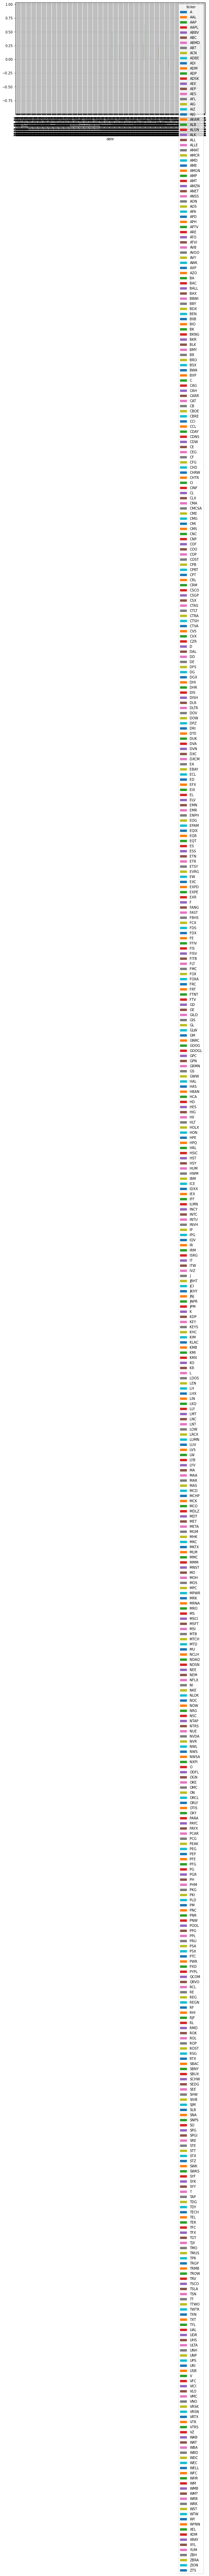

In [55]:
plt.rcParams['figure.figsize'] = [10, 6]
# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()
# Unstack the column ticker
mean_scores = mean_scores.unstack()
# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [24]:
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()
# Unstack the column ticker
mean_scores = mean_scores.unstack()

In [27]:
mean_scores.xs('compound', axis="columns").transpose()

ticker,AMZN,GOOG,TSLA
date,,,
2022-10-09,NaN,0.000000,NaN
2022-10-10,NaN,0.099675,-0.099006
2022-10-11,0.307508,0.154237,0.102600
2022-10-12,0.256738,0.285943,0.210179
2022-10-13,0.117829,0.173022,0.031731
2022-10-14,0.083014,0.213936,-0.107434
2022-10-15,0.077125,0.000000,0.013940


In [61]:
import utils
from tqdm.notebook import tqdm
import time
import urllib.parse

snp500_stocks = utils.get_snp500()
stock_universe = snp500_stocks.index.to_list()

finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
pause_every = 15
ticker_count = 0
for ticker in tqdm(stock_universe):
    ticker_count += 1
    if ticker_count % pause_every == 0:
        time.sleep(2)
    url = finwiz_url + urllib.parse.quote_plus(ticker)
    print(f'\r{url}')
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    try:
        print(f'\r{url}')
        response = urlopen(req)   
        
    except:
        print(f'\rERROR: {url}')
        continue
        
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table
    response.close()


  0%|          | 0/503 [00:00<?, ?it/s]

https://finviz.com/quote.ashx?t=MMM
https://finviz.com/quote.ashx?t=MMM
https://finviz.com/quote.ashx?t=AOS
https://finviz.com/quote.ashx?t=AOS
https://finviz.com/quote.ashx?t=ABT
https://finviz.com/quote.ashx?t=ABT
https://finviz.com/quote.ashx?t=ABBV
https://finviz.com/quote.ashx?t=ABBV
https://finviz.com/quote.ashx?t=ABMD
https://finviz.com/quote.ashx?t=ABMD
https://finviz.com/quote.ashx?t=ACN
https://finviz.com/quote.ashx?t=ACN
https://finviz.com/quote.ashx?t=ATVI
https://finviz.com/quote.ashx?t=ATVI
ERROR: https://finviz.com/quote.ashx?t=ATVI
https://finviz.com/quote.ashx?t=ADM
https://finviz.com/quote.ashx?t=ADM
ERROR: https://finviz.com/quote.ashx?t=ADM
https://finviz.com/quote.ashx?t=ADBE
https://finviz.com/quote.ashx?t=ADBE
ERROR: https://finviz.com/quote.ashx?t=ADBE
https://finviz.com/quote.ashx?t=ADP
https://finviz.com/quote.ashx?t=ADP
ERROR: https://finviz.com/quote.ashx?t=ADP
https://finviz.com/quote.ashx?t=AAP
https://finviz.com/quote.ashx?t=AAP
ERROR: https://finviz.com/

KeyboardInterrupt: 